# Testing of Dr. K. Suresh's Pre- and Post- Filters

In [1]:
# Importing Required Python Libraries
import numpy as np
import scipy.io.wavfile as wav
from IPython.display import Audio
import matplotlib.pyplot as plt
from inputFile import fileDialog
from adaptive_prefilter import adaptive_prefilter
from post_filter import post_filter
from adaptive_prefilter_quant import adaptive_prefilter_quant
import ipywidgets as widgets
from IPython.display import display

#Other Confugirations
#%matplotlib tk
%matplotlib notebook

In [2]:
# Import Audio File
rate, snd = wav.read(fileDialog())


<IPython.core.display.Javascript object>


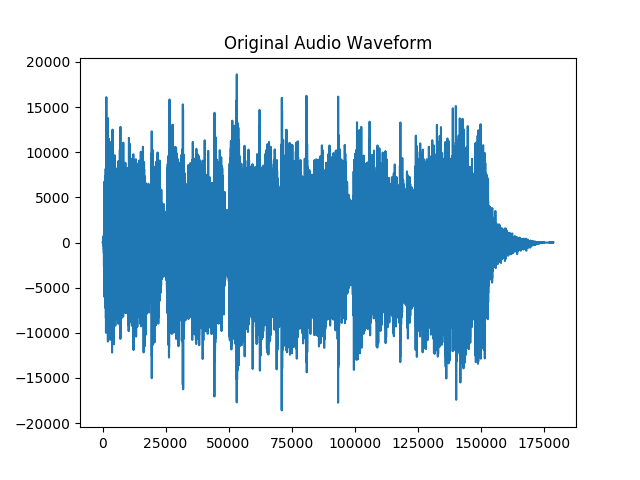

In [3]:
# Plot and Listen to Audio File
plt.figure()
plt.title('Original Audio Waveform')
plt.plot(snd)
Audio(snd, rate=rate)

## Adaptive Pre-Filter Usage:
"It prompts for chosing wav file from folder.

The aurguments are 
N = frame size = 128 
P = filter order , usally 10 or 11 
overlap = interpolation depth for filter coefficients. For a frame size of 128, you can choose 
          overlap in the range 16-32, though it supports values from 1-63

The function returns computed filter coefficents in filter_lattice (P x number of frames size matrix) filterd output in filtered_output ( N x number of frames size matrix) and overlap." - Dr. Suresh

<IPython.core.display.Javascript object>


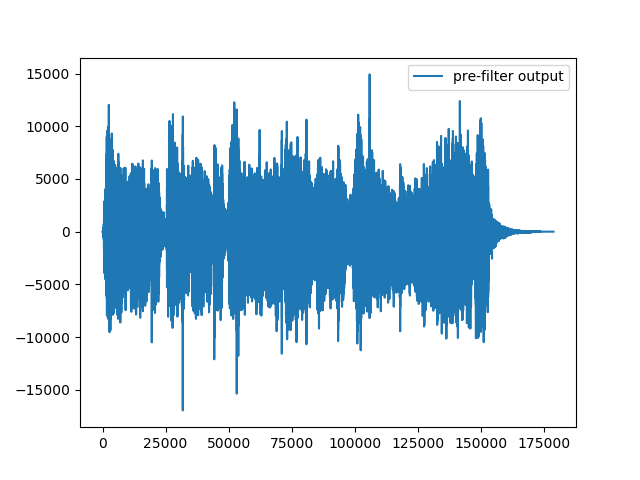

C:\Users\Fera\Documents\Python Scripts\Pre_post_filter\2017-05Suresh\Pre_post_filter/..
(2, 1397)


In [4]:
# Apply Adaptive Pre-Filter
N=128
P=2
Overlap=16
plt.figure()
filter_lattice, filtered_output, overlap = adaptive_prefilter(N, P, Overlap)
output=np.reshape(filtered_output,filtered_output.shape[0]*filtered_output.shape[1],'f')
Audio(output, rate=rate)

## Post Filter Usage:
"reconst = post_filter(fil_coef,filtered,olap,fs)

fil_coef = filter coeefficinet matrix obtined from pre filter
filtered = filtered signal from pre filter 
olap = ineterpolation depth used in pre filter
fs = sampling frequency, used in wavewrite 

The reconstructed signal is returned in reconst 

reconstructed signal is written to reconstructed.wav" - Dr. Suresh


<IPython.core.display.Javascript object>


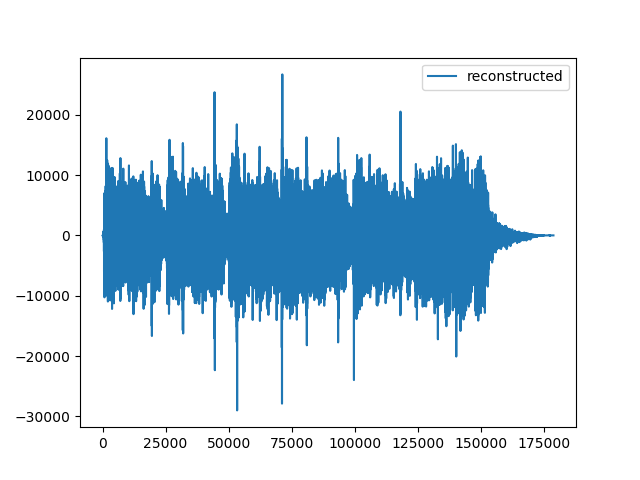

In [10]:
# Apply Post Filter
plt.figure()
norm_coeff=np.ones(filter_lattice.shape[1])
reconst=post_filter(filter_lattice, filtered_output, overlap,rate,norm_coeff)
Audio(reconst,rate=rate)


## Adaptive Pre-Filter + Quantization Usage:

"filt_lattice,filter_output,olap,filtered_spectrum,input_spectrum=adaptive_prefilter_quant(N,P,olap,q)

The aurguments are 
N = frame size = 128 
P = filter order , usally 10 or 11 
overlap = interpolation depth for filter coefficients. For a frame size of 128, you can choose 
          overlap in the range 16-32, though it supports values from 1-63

q = is used to change quantization level of the filtered signal,  can give values 2,4,8,...512. 
     ( \hat(x) = q* trunc (x/q )) ie filter output is divided by q, truncates, and then   multiplied by q." - Dr. Suresh

<IPython.core.display.Javascript object>


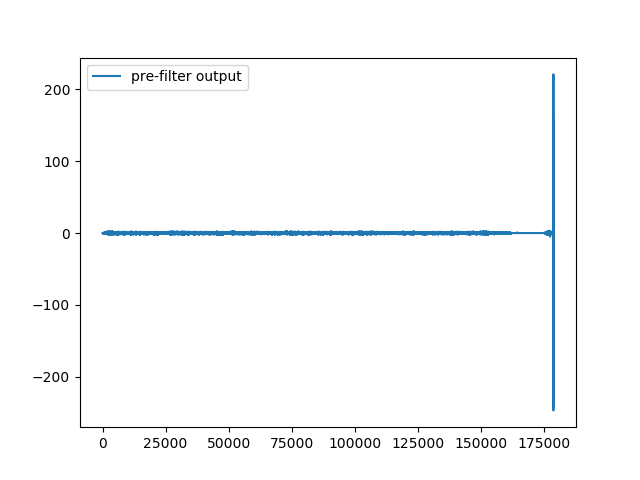

(10, 1397)
1.00483918761


In [11]:
N=128
P=10
olap=16
q=2
plt.figure()
filter_lattice, filtered_output, overlap ,filtered_spectrum,input_spectrum, norm_coeff=adaptive_prefilter_quant(N,P,olap,q)

<IPython.core.display.Javascript object>


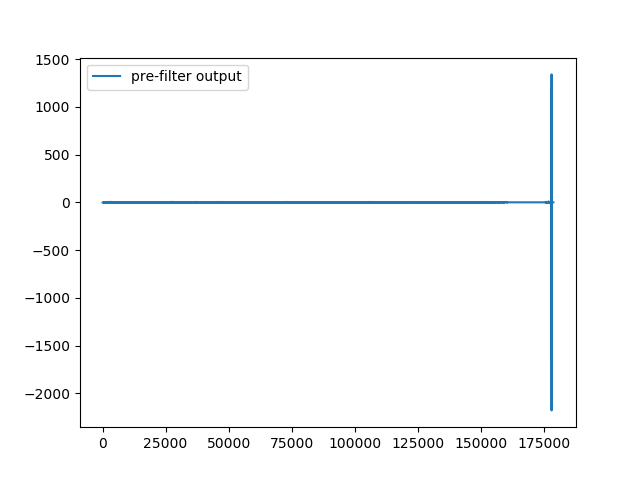

(10, 1397)
1.1001639526


In [15]:
# Widgets for Interaction

title = widgets.HTML(
    value="<b>Adaptive Pre-Filter</b>",
    placeholder='Adaptive Pre-Filter',
    description='Adaptive Pre-Filter',
    disabled=False
)

N=widgets.IntSlider(
    value=128,
    min=64,
    max=1024,
    step=1,
    description='Frame Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i'
)

P=widgets.IntSlider(
    value=10,
    min=2,
    max=28,
    step=1,
    description='Filter Order:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i'
)

olap=widgets.IntSlider(
    value=16,
    min=1,
    max=63,
    step=1,
    description='Overlap:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i'
)

q=widgets.FloatSlider(
    value=1,
    min=0.5,
    max=512,
    step=0.5,
    description='Quantization:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

applyFilterButton = widgets.Button(description="Apply Filter")

display(title)
commandBox1=widgets.HBox((N, P, olap))
commandBox2=widgets.HBox((q, applyFilterButton))
display(commandBox1)
display(commandBox2)

#global filter_lattice, filtered_output, overlap ,filtered_spectrum,input_spectrum
                         
def on_applyFilterButton_clicked(b):
    global filtered_output
    global filter_lattice
    global overlap
    global filtered_spectrum
    global input_spectrum
    global norm_coeff
    plt.figure()
    filter_lattice, filtered_output, overlap ,filtered_spectrum,input_spectrum, norm_coeff=adaptive_prefilter_quant(N.value,P.value,olap.value,q.value)
                         
applyFilterButton.on_click(on_applyFilterButton_clicked)


In [16]:
# Play Output of Pre-Filter
output=np.reshape(filtered_output,filtered_output.shape[0]*filtered_output.shape[1],'f')
Audio(output[:150000], rate=rate)


<IPython.core.display.Javascript object>


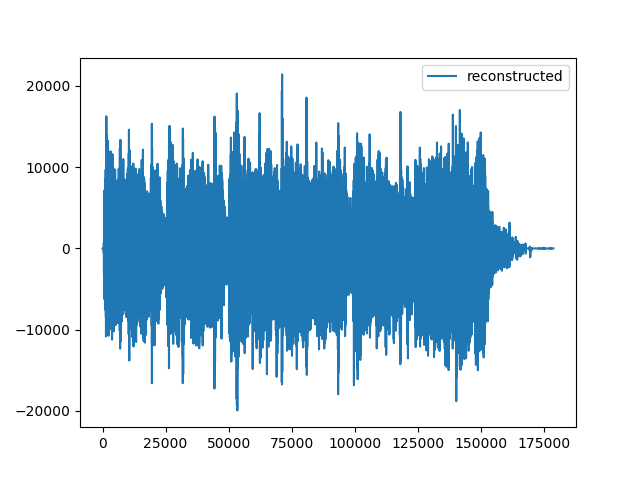

In [17]:
# Apply Post Filter
plt.figure()
reconst=post_filter(filter_lattice, filtered_output, overlap,rate, norm_coeff)
Audio(reconst[:150000],rate=rate)